In [1]:
import polars as pl 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:

news = (
    pl.read_csv(
        r"C:\Users\faune\Downloads\lab1\lab1\data\dow_jones_news.csv", 
        separator=';'
    )
    .with_columns(
        pl.col('news').str.split('***')
    )
)
display(
    news
    .with_columns(
        pl.col('news').list.len().alias('nb_news'),
        pl.col('news').list.join('.').str.len_chars().alias('total_length')
    )
    .drop('news','Date')
    .describe()
)

statistic,Label,nb_news,total_length
str,f64,f64,f64
"""count""",1719.0,1719.0,1719.0
"""null_count""",0.0,0.0,0.0
"""mean""",0.499127,850.158813,61605.722513
"""std""",0.500145,236.960182,17578.285985
"""min""",0.0,55.0,3503.0
"""25%""",0.0,748.0,53761.0
"""50%""",0.0,877.0,64524.0
"""75%""",1.0,994.0,72899.0
"""max""",1.0,1613.0,124160.0


In [3]:
news = news.sort('Date').with_columns(pl.col('news').list.join('|'))
news = (
    news.with_columns(
        pl.col('news').str.len_chars().alias('length')
    )
    .with_columns(
        pl.when(pl.col('length').ge(8192))
        .then(pl.col('news').str.head(8191))
        .otherwise(pl.col('news')).alias('stripped_news')
    )
    .with_columns(
        pl.col('stripped_news')
        .str.split('|')
        .list.head(
            pl.col('stripped_news').str.split('|').list.len()-1
        ).list.join('|')
    )
    .with_columns(pl.col('stripped_news').str.len_chars().alias('stripped_length'))
)


In [9]:
histplot = news.with_columns(pl.col('stripped_news').str.split('|'), pl.col('Date').cast(pl.Date)).with_columns(pl.col('Date').dt.year().alias('year')).explode('stripped_news').select('year', 'Date')

<Axes: xlabel='year', ylabel='Count'>

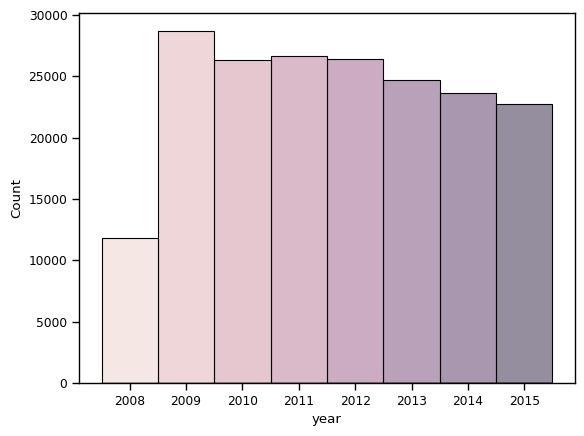

In [22]:
sns.set_context(context='paper')
sns.histplot(data=histplot.to_pandas(), x = 'year', binwidth=1, discrete=True, palette=sns.cubehelix_palette(n_colors=8), hue='year', legend=False)